## Preparing the tools



In [201]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import learning_curve, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier # Importação para a Rede Neural
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize, StandardScaler # Added StandardScaler
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold

Importing the dataset and exploring it

In [202]:
data = pd.read_csv('data.csv',sep=';' )
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [203]:
## DataPreparation
label = data.columns[-1]
features = list(data.columns[:-1])
num_features = len(features)

print("Number of features: ", num_features)
print("Features: ", features)
print("Label: ", label, ", Can be: ", data[label].unique())






Number of features:  36
Features:  ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation 

## Data Balancing

We will use SMOTE to balance the dataset. SMOTE stands for Synthetic Minority Over-sampling Technique, which is a method to create synthetic samples for the minority class in an imbalanced dataset.

In [204]:
# Balancing the dataset
Dropout = data[data[label] == 'Dropout']
Graduate = data[data[label] == 'Graduate']
Enrolled = data[data[label] == 'Enrolled']

print("Graduate: ", Graduate.shape[0])
print("Dropout: ", Dropout.shape[0])
print("Enrolled: ", Enrolled.shape[0])


Graduate:  2209
Dropout:  1421
Enrolled:  794


In [205]:
from imblearn.over_sampling import SMOTE
Enrolled = data[data[label] == 'Enrolled']

# Graduate = Graduate.sample(Enrolled.shape[0])
# Dropout = Dropout.sample(Enrolled.shape[0])
# balanced_data = pd.concat([Enrolled, Graduate, Dropout], axis=0)
# X_resampled = balanced_data[features]
# y_resampled = balanced_data[label]

X = data[features]
y = data[label]

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Original dataset shape",y.value_counts())
print("Resampled dataset shape", y_resampled.value_counts())

data_resampled = pd.DataFrame(X_resampled,columns=features)
data_resampled[label]= y_resampled

print(data_resampled.head())
print(data_resampled[label].value_counts())

Original dataset shape Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64
Resampled dataset shape Target
Dropout     2209
Graduate    2209
Enrolled    2209
Name: count, dtype: int64
   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)

## Feature Analysis

We will analyze the features of the dataset to understand their distributions and relationships with the target variable.

/home/andre/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Feature importances calculated using: Linear
Feature importances calculated using: Tree-based
Feature importances calculated using: Permutation
Feature importances for model LogisticRegression:
Feature importances for model RandomForestClassifier:
Feature importances for model MLPClassifier:


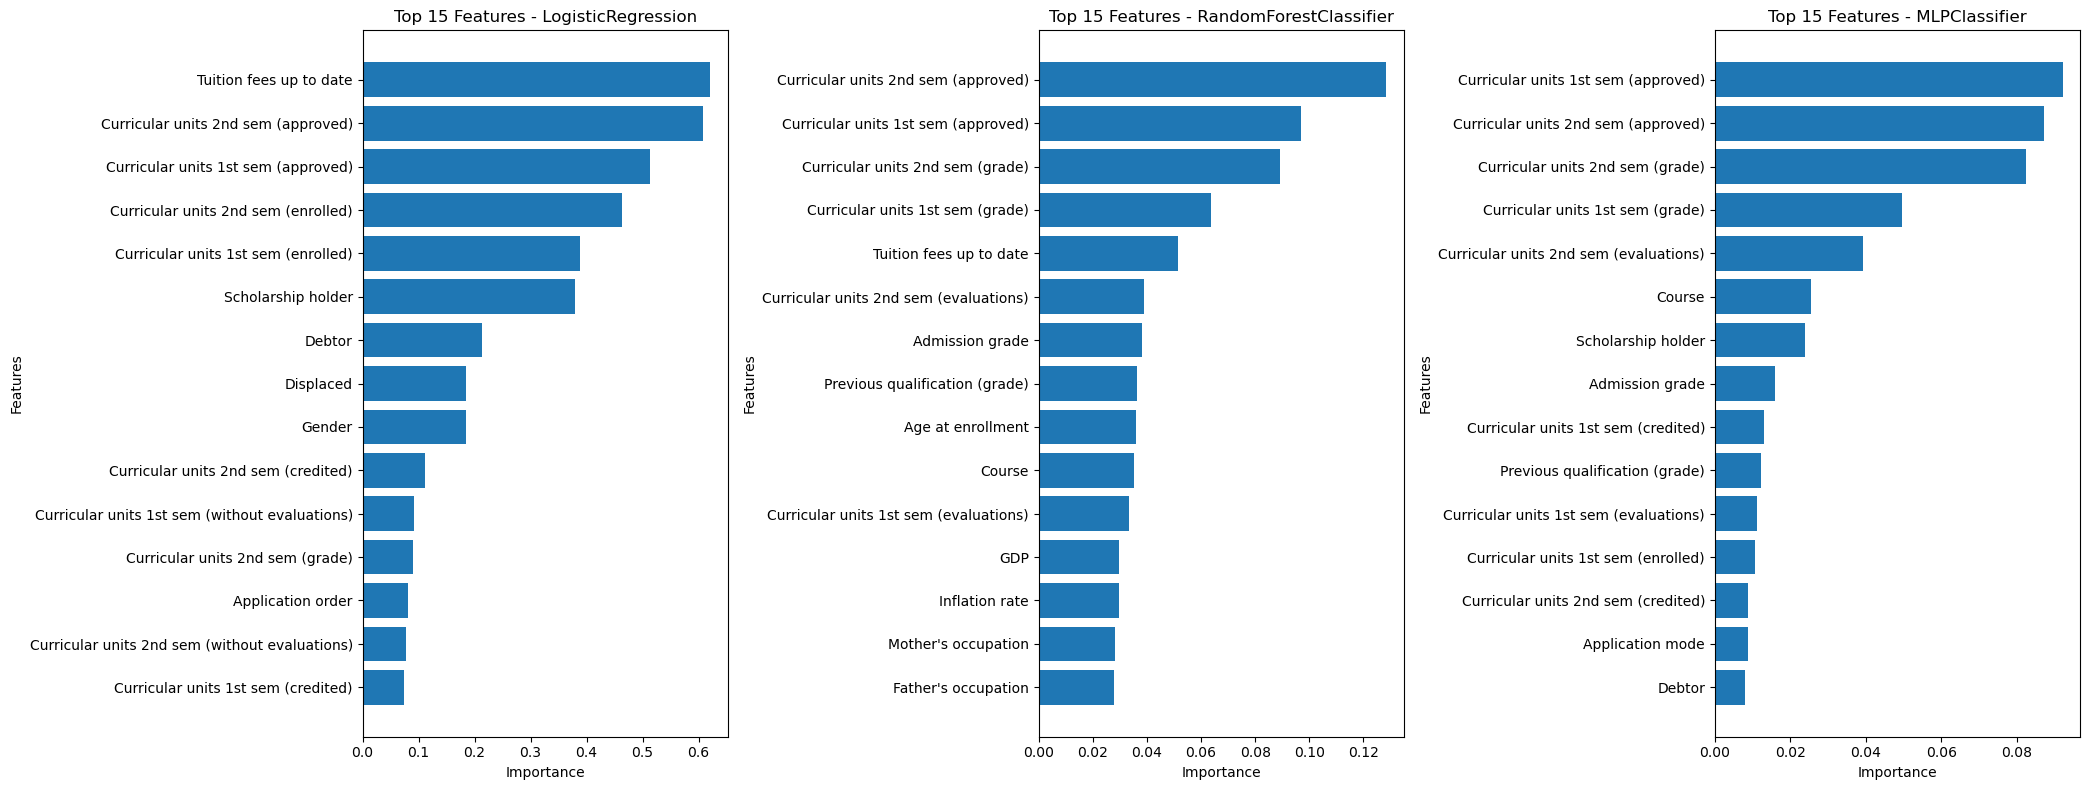

In [206]:
from sklearn.inspection import permutation_importance

def get_feature_importance(model, X, y, feature_names):
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        method = "Tree-based"
    elif hasattr(model, "coef_"):
        importances = np.abs(model.coef_).mean(axis=0)
        method = "Linear"
    else:
        # Fallback to permutation importance
        result = permutation_importance(model, X, y, n_repeats=10, random_state=42, n_jobs=-1)
        importances = result.importances_mean
        method = "Permutation"
    importance_df = pd.DataFrame({
        "Feature": feature_names,
        "Importance": importances
    }).sort_values(by="Importance", ascending=False)
    print(f"Feature importances calculated using: {method}")
    return importance_df

N= 15 # Number of top features to display

# Fit the models first
models = [
    LogisticRegression(max_iter=5000).fit(X_resampled, y_resampled),
    RandomForestClassifier().fit(X_resampled, y_resampled),
    MLPClassifier(max_iter=5000).fit(X_resampled, y_resampled)
]

# Get feature importance for each model
importance_dfs = []
for model in models:
    importance_df = get_feature_importance(model=model, X=X_resampled, y=y_resampled, feature_names=features)
    importance_dfs.append(importance_df)
fig, axes = plt.subplots(1, len(importance_dfs), figsize=(7 * len(importance_dfs), 8))
# Combine the results or analyze them separately
for i, importance_df in enumerate(importance_dfs):
    print(f"Feature importances for model {models[i].__class__.__name__}:")
    axes[i].barh(importance_df["Feature"][:N], importance_df["Importance"][:N])
    axes[i].set_title(f"Top {N} Features - {models[i].__class__.__name__}")
    axes[i].set_xlabel("Importance")
    axes[i].set_ylabel("Features")
    axes[i].invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()



## Correlation Matrix

Starting correlation analysis for top features...
Features for correlation analysis


/home/andre/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/andre/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


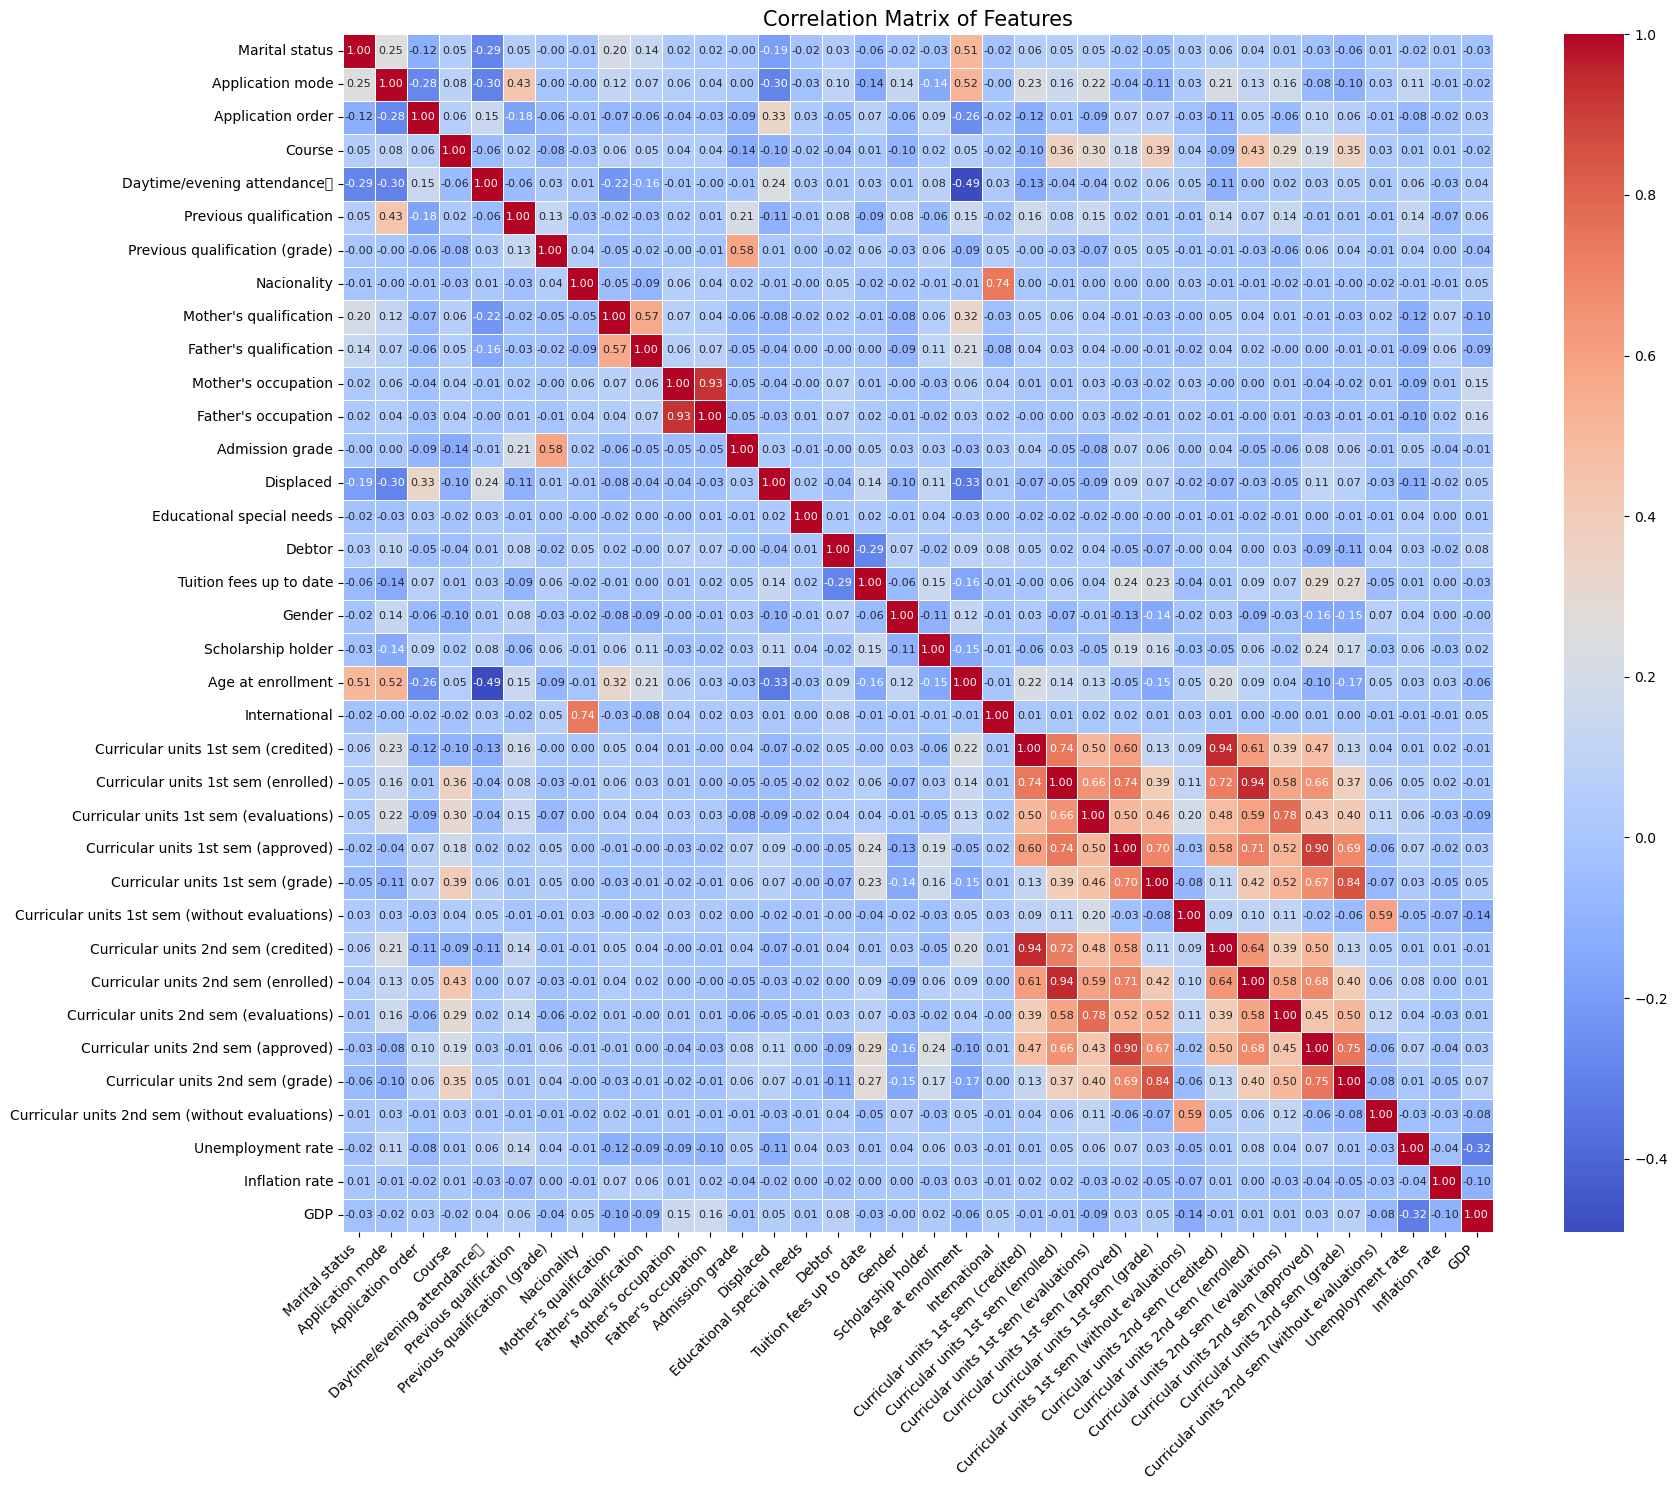

Found highly correlated pairs (threshold > 0.8):
  - 'Mother's occupation' and 'Father's occupation' have a correlation of 0.93
  - 'Curricular units 1st sem (credited)' and 'Curricular units 2nd sem (credited)' have a correlation of 0.94
  - 'Curricular units 1st sem (enrolled)' and 'Curricular units 2nd sem (enrolled)' have a correlation of 0.94
  - 'Curricular units 1st sem (approved)' and 'Curricular units 2nd sem (approved)' have a correlation of 0.90
  - 'Curricular units 1st sem (grade)' and 'Curricular units 2nd sem (grade)' have a correlation of 0.84


In [207]:
import pandas as pd
import numpy as np
import seaborn as sns # For a prettier heatmap
import matplotlib.pyplot as plt

# --- Prerequisites ---
# Ensure X_resampled_df and importance_df are available from the previous cell.
# X_resampled_df: pandas DataFrame of your features after SMOTE.
# importance_df: pandas DataFrame with 'Feature' and 'Importance' columns.

print("Starting correlation analysis for top features...")

# --- 1. Select Top N Features ---
# Extract all feature names
all_feature_names = data_resampled.columns[:-1].tolist()  # Exclude the target column
X_features_df = data_resampled[all_feature_names]

print(f"Features for correlation analysis")

# --- 2. Calculate Correlation Matrix ---
correlation_matrix = X_features_df.corr()


# --- 3. Visualize Correlation Matrix as a Heatmap ---
plt.figure(figsize=(18, 15)) # Adjust size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 8})
plt.title(f'Correlation Matrix of Features', fontsize=15)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


# Example of how to find highly correlated pairs (you'll need to inspect the heatmap or matrix directly)
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop_candidates = set()
highly_correlated_pairs = []

for column in upper.columns:
    for row_label in upper.index:
        if abs(upper.loc[row_label, column]) > 0.8: # Threshold for high correlation
            highly_correlated_pairs.append((row_label, column, upper.loc[row_label, column]))
            # Basic strategy: mark the one with lower overall importance to consider dropping
            # This is a simplistic approach; manual review is better.
            # Ensure importance_df is indexed by 'Feature' for easy lookup
            importance_df_indexed = importance_df.set_index('Feature')
            if column in importance_df_indexed.index and row_label in importance_df_indexed.index:
                if importance_df_indexed.loc[column, 'Importance'] < importance_df_indexed.loc[row_label, 'Importance']:
                    # to_drop_candidates.add(column) # Example: mark for potential drop
                    pass # Deciding which to drop needs care
                else:
                    # to_drop_candidates.add(row_label) # Example: mark for potential drop
                    pass

if highly_correlated_pairs:
    print("Found highly correlated pairs (threshold > 0.8):")
    for pair in highly_correlated_pairs:
        print(f"  - '{pair[0]}' and '{pair[1]}' have a correlation of {pair[2]:.2f}")
else:
    print("No feature pairs found with correlation > 0.8 among the top selected features.")



## Trainning and Comparing Models

In [208]:


from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt

def model_compare(algorithm,X,y):
    
    figure, charts = plt.subplots(8,len(algorithm), figsize=(6*len(algorithm), 54)) # Increased rows to 8, adjusted figsize height
    if len(algorithm) == 1:
        charts= np.expand_dims(charts, axis=1) 
    figure.suptitle('Model Comparison', fontsize=20)
    classes = np.unique(y)
    n_classes = len(classes)
    
    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0, stratify=y) 
    y_test_binarized = label_binarize(y_test, classes=classes)
    
    for i, algo in enumerate(algorithm):
        algo.fit(X_train, y_train)
        y_pred = algo.predict(X_test)
        y_pred_proba = algo.predict_proba(X_test) if hasattr(algo, 'predict_proba') else None
        print()
        print(f"Algorithm: {algo.__class__.__name__}")
        print(f"Train")
        print(f"    Accuracy: {algo.score(X_train, y_train):.4f}")
        print(f"    F1 Score: {f1_score(y_train, algo.predict(X_train), average='weighted', zero_division=0):.4f}")
        print()
        print(f"Test")
        print(f"    Accuracy: {algo.score(X_test, y_test):.4f}")
        print(f"    F1 Score: {f1_score(y_test, y_pred, average='weighted', zero_division=0):.4f}")
        print()
        print(f"Precision: {precision_score(y_test, y_pred, average='weighted', zero_division=0):.4f}")
        print(f"Recall: {recall_score(y_test, y_pred, average='weighted', zero_division=0):.4f}")
        
        
    
        # # Learning Curve
        # cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=42)
        train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(algo, X_scaled, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), return_times=True)
        train_scores_mean = np.mean(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        charts[0,i].plot(train_sizes, train_scores_mean, label='Training Score', color='blue')
        charts[0,i].plot(train_sizes, test_scores_mean, label='Cross-Validation Score', color='orange')
        charts[0,i].set_title(f'Learning Curve: {algo.__class__.__name__}')
        charts[0,i].set_xlabel('Training Size')
        charts[0,i].set_ylabel('Score')
        charts[0,i].set_ylim(0, 1.1)
        charts[0,i].legend(loc='best')
        charts[0,i].grid()
        

        # Matriz de Confusão Treino    
        y_train_pred = algo.predict(X_train)
        cm_train = confusion_matrix(y_train, y_train_pred, labels=classes)
        charts[1,i].imshow(cm_train, cmap='Blues', interpolation='nearest')
        charts[1,i].set_title('Confusion Matrix Train')
        charts[1,i].set_xticks(np.arange(n_classes))
        charts[1,i].set_yticks(np.arange(n_classes))
        charts[1,i].set_xticklabels(classes, rotation=45, ha="right")
        charts[1,i].set_yticklabels(classes)
        for row in range(n_classes):
            for col in range(n_classes):
                charts[1,i].text(col, row, cm_train[row, col], ha='center', va='center', color='red' if cm_train[row,col] > cm_train.max()/2 else 'black')
            

        # Matriz de Confusão Teste
        cm = confusion_matrix(y_test, y_pred, labels=classes)
        charts[2,i].imshow(cm, cmap='Blues', interpolation='nearest')
        charts[2,i].set_title('Confusion Matrix Test')
        charts[2,i].set_xticks(np.arange(n_classes))
        charts[2,i].set_yticks(np.arange(n_classes))
        charts[2,i].set_xticklabels(classes, rotation=45, ha="right")
        charts[2,i].set_yticklabels(classes)
        for row in range(n_classes):
            for col in range(n_classes):
                charts[2,i].text(col, row, cm[row, col], ha='center', va='center', color='red' if cm[row,col] > cm.max()/2 else 'black')

        # Gráfico de Barras das Métricas
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
        charts[3,i].bar(['Precision', 'Recall', 'F1 Score'], [precision, recall, f1])
        charts[3,i].set_title('Overall Metrics (Weighted Avg)')
        
        # Curva ROC
        if y_pred_proba is not None and n_classes > 1:
            charts[4,i].set_title('ROC Curve (One-vs-Rest)')
            colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])
            for j, color in zip(range(n_classes), colors):
                fpr, tpr, _ = roc_curve(y_test_binarized[:, j], y_pred_proba[:, j])
                roc_auc = auc(fpr, tpr)
                charts[4,i].plot(fpr, tpr, color=color, lw=2, label=f'ROC curve of class {classes[j]} (area = {roc_auc:0.2f})')
            charts[4,i].plot([0, 1], [0, 1], 'k--', lw=2)
            charts[4,i].set_xlim([0.0, 1.0])
            charts[4,i].set_ylim([0.0, 1.05])
            charts[4,i].set_xlabel('False Positive Rate')
            charts[4,i].set_ylabel('True Positive Rate')
            charts[4,i].legend(loc="lower right", fontsize='small')
        else:
            charts[4,i].text(0.5, 0.5, 'ROC not available\\nor not applicable', ha='center', va='center')
        
        # Curva Precision-Recall
        if y_pred_proba is not None and n_classes > 1:
            charts[5,i].set_title('Precision-Recall Curve (One-vs-Rest)')
            colors = cycle(['blue', 'green', 'red', 'cyan', 'magenta', 'yellow'])
            for j, color in zip(range(n_classes), colors):
                precision_vals, recall_vals, _ = precision_recall_curve(y_test_binarized[:, j], y_pred_proba[:, j])
                charts[5,i].plot(recall_vals, precision_vals, color=color, lw=2, label=f'P-R curve of class {classes[j]}')
            charts[5,i].set_xlabel('Recall')
            charts[5,i].set_ylabel('Precision')
            charts[5,i].set_ylim([0.0, 1.05])
            charts[5,i].set_xlim([0.0, 1.0])
            charts[5,i].legend(loc="lower left", fontsize='small')
        else:
            charts[5,i].text(0.5, 0.5, 'P-R curve not available\n\nor not applicable', ha='center', va='center')
        
        # Scalability of the model (Fit Times)
        charts[6,i].plot(train_sizes, np.mean(fit_times, axis=1), label='Fit Time', color='green', marker='o')
        charts[6,i].set_title(f'Scalability (Fit Time): {algo.__class__.__name__}')
        charts[6,i].set_xlabel('Training Size')
        charts[6,i].set_ylabel('Fit Time (seconds)')
        charts[6,i].legend(loc='best')
        charts[6,i].grid(True)
        
        # Scoring Time vs Training Size
        charts[7,i].plot(train_sizes, np.mean(score_times, axis=1), label='Score Time', color='purple', marker='o')
        charts[7,i].set_title(f'Scoring Time: {algo.__class__.__name__}')
        charts[7,i].set_xlabel('Training Size')
        charts[7,i].set_ylabel('Score Time (seconds)')
        charts[7,i].legend(loc='best')
        charts[7,i].grid(True)

    plt.subplots_adjust(hspace=0.4, wspace=0.4) # May need hspace adjustment for 8 rows, tight_layout should help
    plt.suptitle('Model Comparison', fontsize=20)
    plt.subplots_adjust(top=0.95)  # Adjust top to fit the title
                         
    plt.tight_layout(rect=[0, 0, 1, 0.96]) 
    plt.show()

## Training the models with the balanced dataset



Algorithm: LogisticRegression
Train
    Accuracy: 0.7764
    F1 Score: 0.7764

Test
    Accuracy: 0.7597
    F1 Score: 0.7609

Precision: 0.7648
Recall: 0.7597

Algorithm: RandomForestClassifier
Train
    Accuracy: 1.0000
    F1 Score: 1.0000

Test
    Accuracy: 0.8250
    F1 Score: 0.8254

Precision: 0.8287
Recall: 0.8250

Algorithm: MLPClassifier
Train
    Accuracy: 0.9871
    F1 Score: 0.9871

Test
    Accuracy: 0.7697
    F1 Score: 0.7698

Precision: 0.7700
Recall: 0.7697


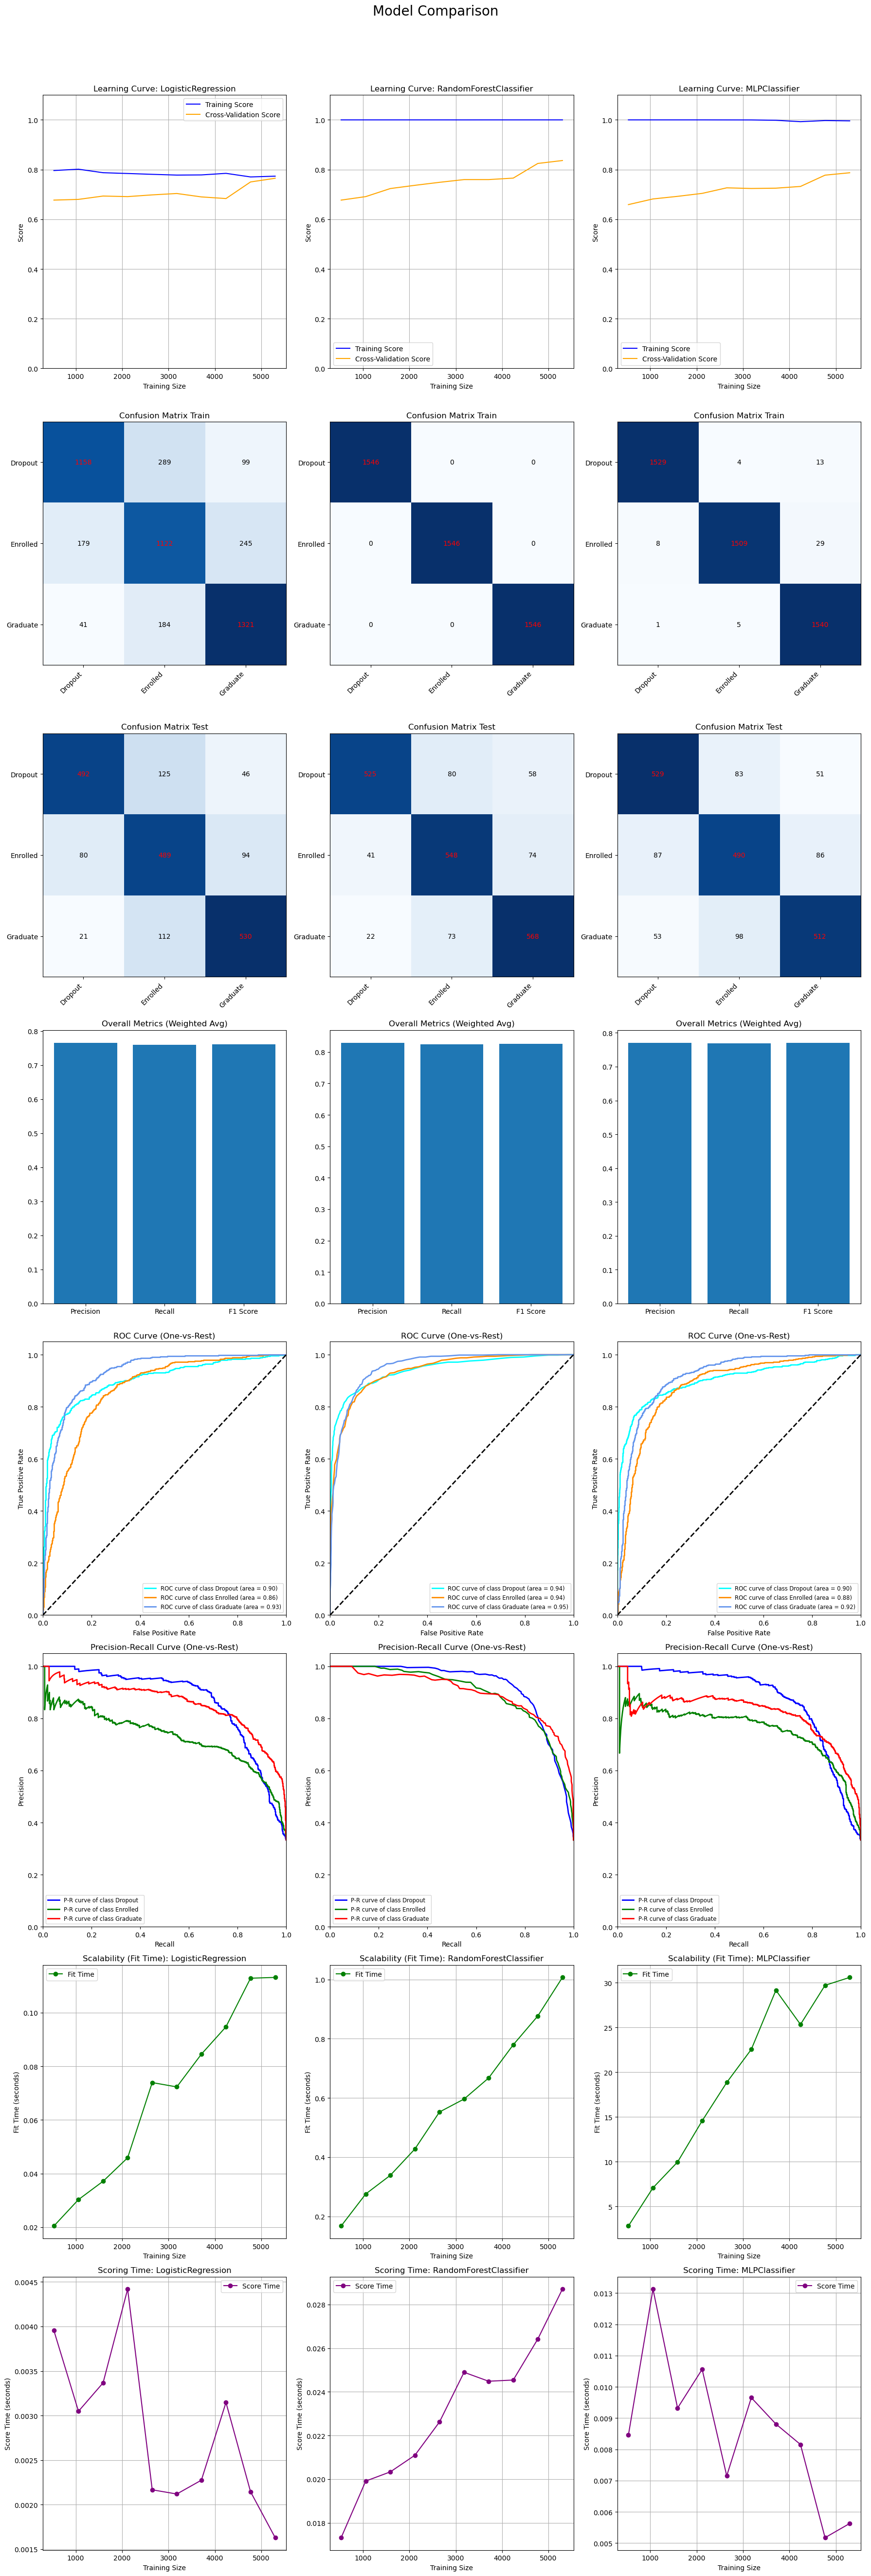

In [209]:
model_compare([
    LogisticRegression(max_iter=5000),
    RandomForestClassifier(),
    MLPClassifier(max_iter=5000) 
], X_resampled, y_resampled)

## Hyperparameter Tuning

Starting hyperparameter tuning...
Tuning Logistic Regression...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Logistic Regression Parameters: {'C': 10, 'class_weight': None, 'max_iter': 5000, 'penalty': 'l2', 'solver': 'lbfgs'}
Tuning RandomForestClassifier...
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best RandomForest Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
\nTuning MLPClassifier...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best MLPClassifier Parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.01}
\nRunning model_compare with tuned models...

Algorithm: LogisticRegression
Train
    Accuracy: 0.7768
    F1 Score: 0.7768

Test
    Accuracy: 0.7617
    F1 Score: 0.7628

Precision: 0.7664
Recall: 0.7617

Algorithm: RandomForestClassifier
Train
    Accuracy: 1.0000
    F1 Score: 1.0000

Test
    Accuracy: 0.8321
    F1 

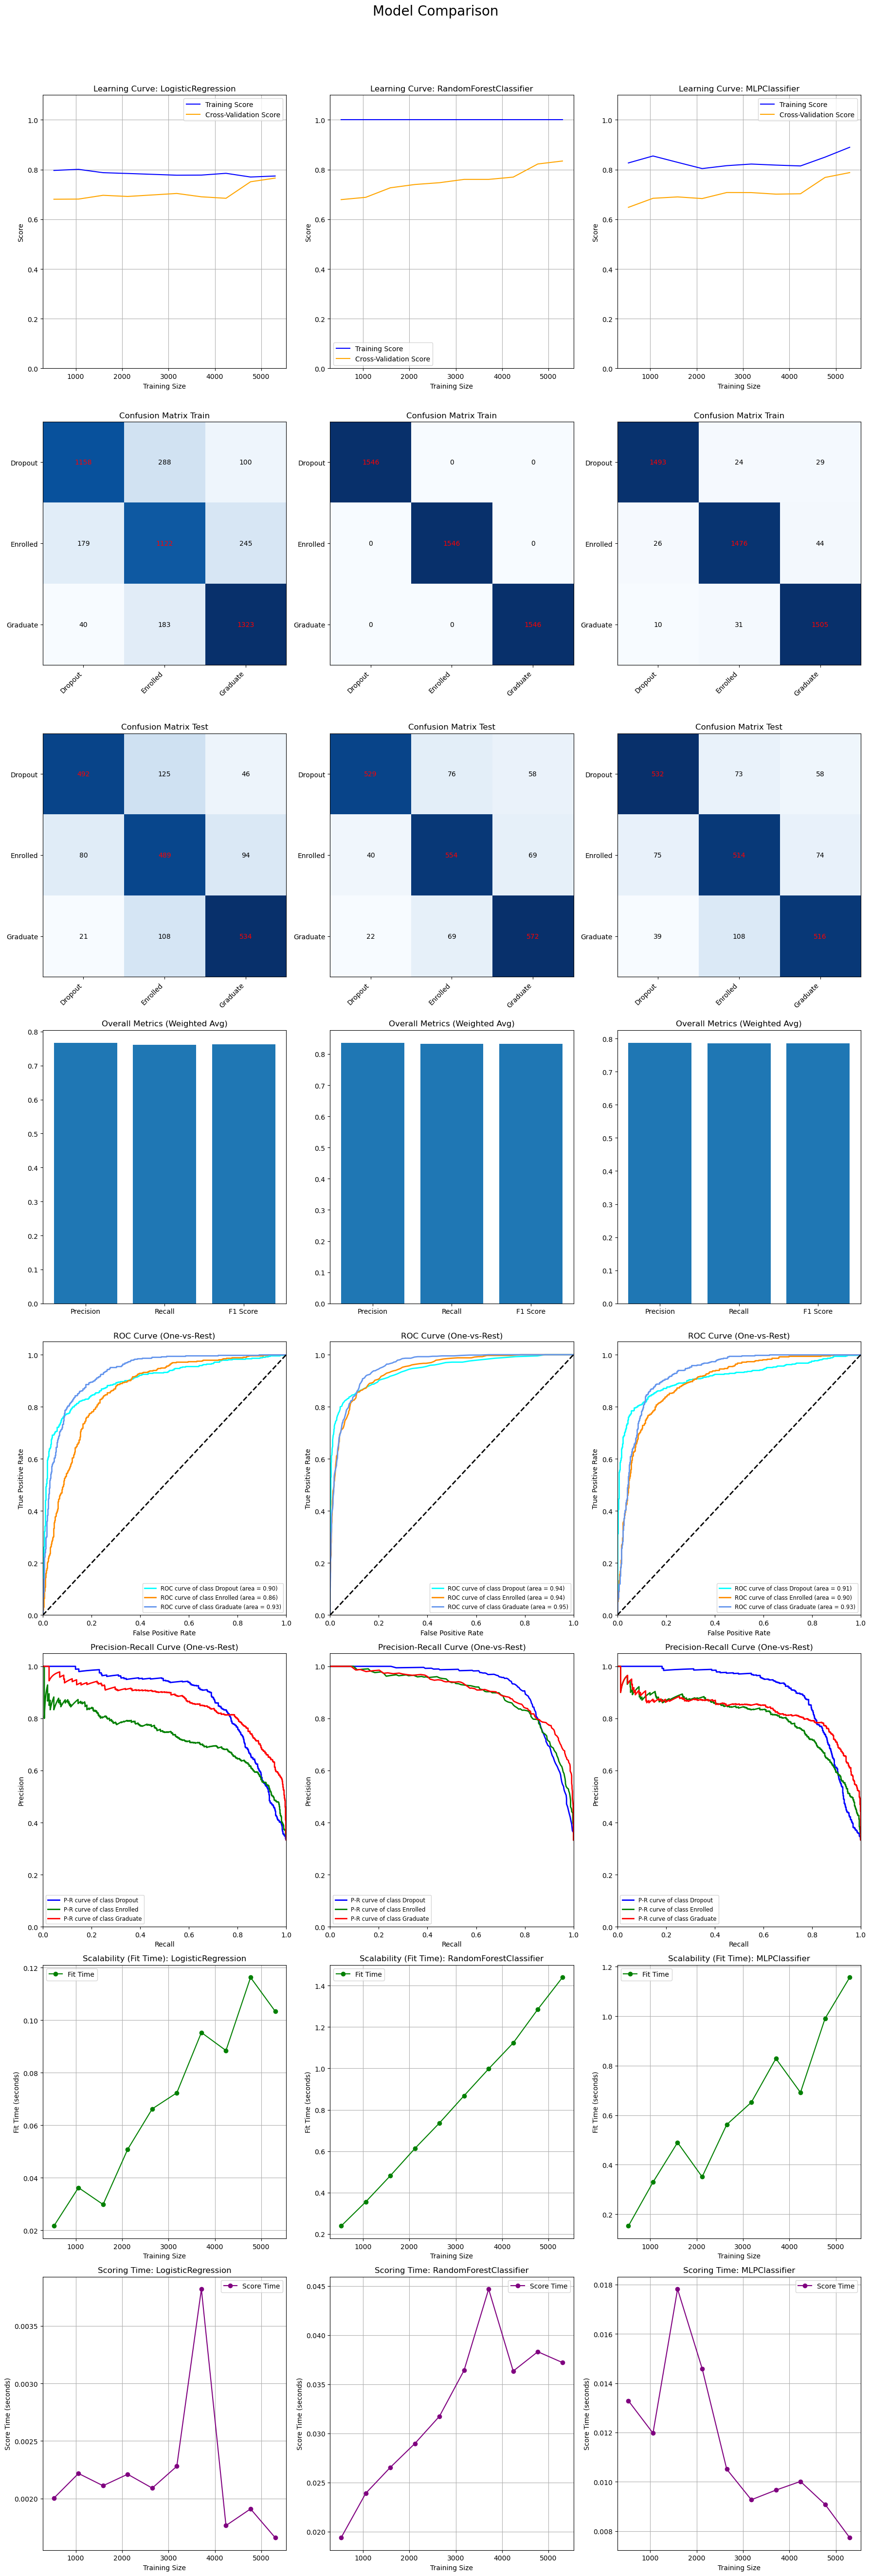

In [210]:

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler # Ensure this is available if X_resampled is not already scaled
import pandas as pd # Ensure pandas is imported if you're using X_resampled directly from a DataFrame

print("Starting hyperparameter tuning...")


# --- Logistic Regression Tuning ---
print("Tuning Logistic Regression...")
log_reg = {
    'solver': ['lbfgs', 'saga'], # solvers that support multi-class
    'max_iter': [5000], # Increased max_iter for convergence
    'C': [0.01, 0.1, 1, 10], # Regularization strength
    'class_weight': [None, 'balanced'], # Handle class imbalance
    'penalty': ['l2'] # Regularization type, 'l1' is not supported by all solvers
}

log_reg_grid_search = GridSearchCV(LogisticRegression(random_state=42), log_reg, cv=3, scoring='f1_weighted', n_jobs=-1, verbose=1)
# Using cv=3 for faster tuning in this example; consider cv=5 for more robust results
X_resampled_scaled_for_log_reg_tune = StandardScaler().fit_transform(X_resampled)
log_reg_grid_search.fit(X_resampled_scaled_for_log_reg_tune, y_resampled)
best_log_reg = log_reg_grid_search.best_estimator_
print(f"Best Logistic Regression Parameters: {log_reg_grid_search.best_params_}")


# --- Random Forest Classifier Tuning ---
print("Tuning RandomForestClassifier...")
rf_param_grid = {
    'n_estimators': [100, 150],       # Number of trees
    'max_depth': [10, 20, None],      # Max depth of trees
    'min_samples_split': [2, 5],    # Min samples to split a node
    'min_samples_leaf': [1, 2, 4]     # Min samples at a leaf node
}
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=3, scoring='f1_weighted', n_jobs=-1, verbose=1)
# Using cv=3 for faster tuning in this example; consider cv=5 for more robust results
# Using n_jobs=-1 to use all available processor cores
# Using verbose=1 to see progress

rf_grid_search.fit(X_resampled, y_resampled) # Fit on the resampled data (unscaled, as scaling happens in model_compare)
best_rf = rf_grid_search.best_estimator_
print(f"Best RandomForest Parameters: {rf_grid_search.best_params_}")

# --- MLP Classifier Tuning ---
print("\\nTuning MLPClassifier...")
mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50,30)], # Neuron configurations
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001],          # L2 regularization
    'learning_rate_init': [0.001, 0.01]
}
X_resampled_scaled_for_mlp_tune = StandardScaler().fit_transform(X_resampled)


mlp_grid_search = GridSearchCV(MLPClassifier(max_iter=5000, random_state=42, early_stopping=True, n_iter_no_change=10), # Reduced max_iter for faster tuning, added early stopping
                               mlp_param_grid, cv=3, scoring='f1_weighted', n_jobs=-1, verbose=1)
mlp_grid_search.fit(X_resampled_scaled_for_mlp_tune, y_resampled) # Fit on scaled data for MLP tuning
best_mlp = mlp_grid_search.best_estimator_
print(f"Best MLPClassifier Parameters: {mlp_grid_search.best_params_}")


# --- Run model_compare with the best estimators ---
print("\\nRunning model_compare with tuned models...")
model_compare([best_log_reg, best_rf, best_mlp], X_resampled, y_resampled)


## Training the models with the best features


Training LogisticRegression with its top 10 features:

Algorithm: LogisticRegression
Train
    Accuracy: 0.7559
    F1 Score: 0.7554

Test
    Accuracy: 0.7446
    F1 Score: 0.7445

Precision: 0.7448
Recall: 0.7446


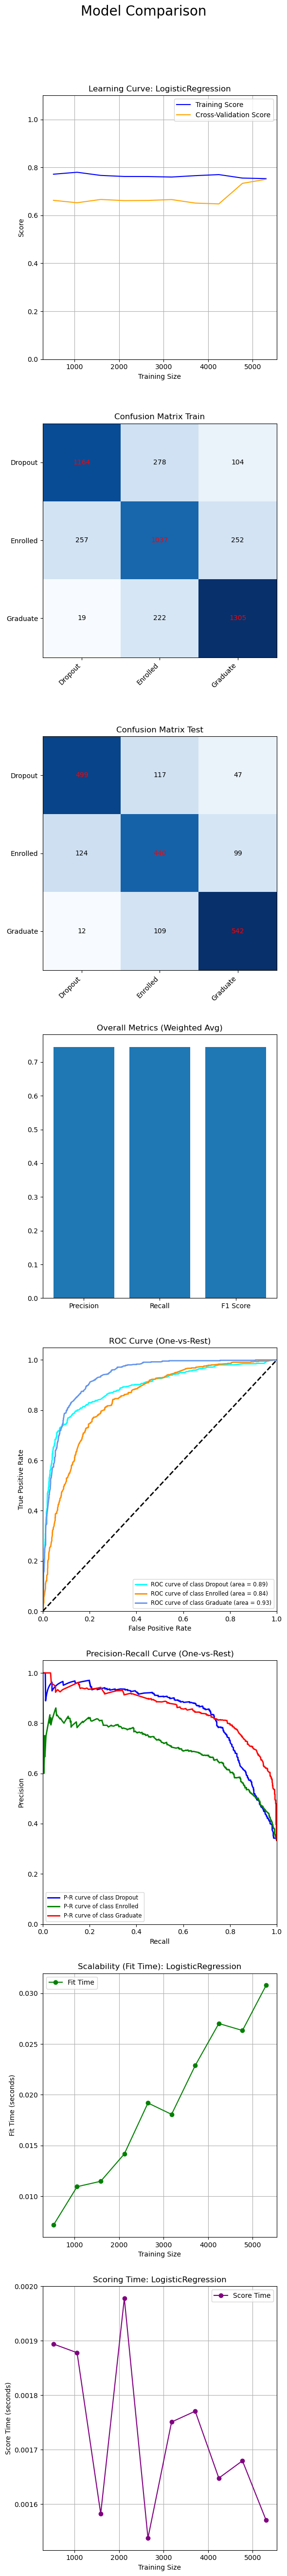


Training RandomForestClassifier with its top 10 features:

Algorithm: RandomForestClassifier
Train
    Accuracy: 1.0000
    F1 Score: 1.0000

Test
    Accuracy: 0.7964
    F1 Score: 0.7975

Precision: 0.8017
Recall: 0.7964


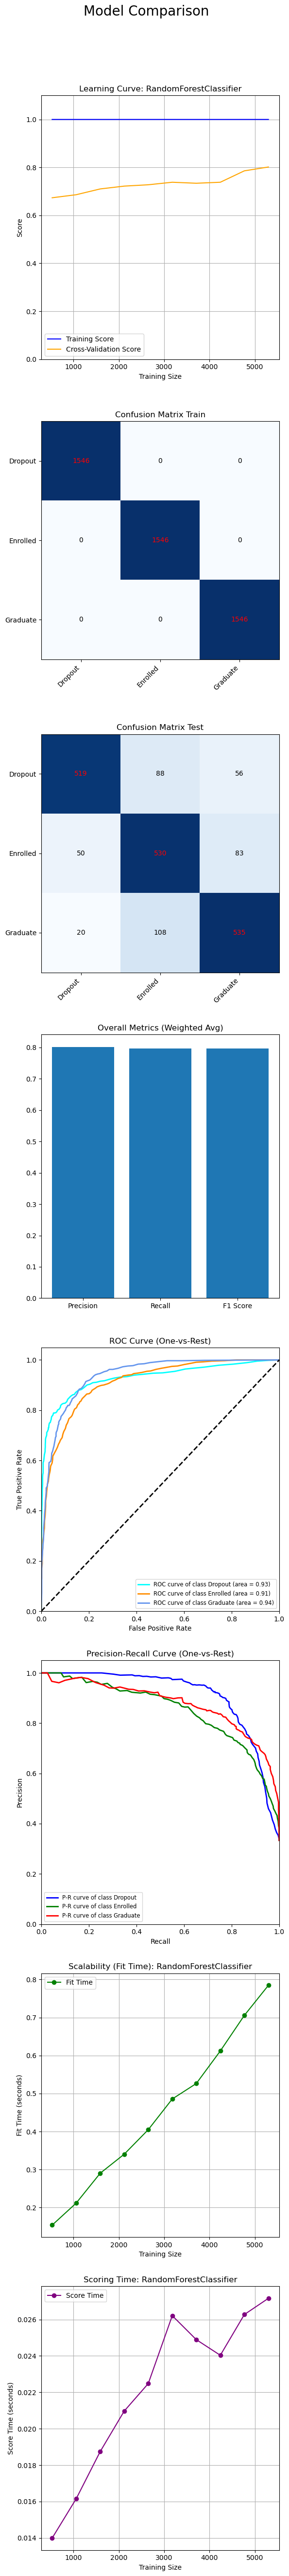


Training MLPClassifier with its top 10 features:

Algorithm: MLPClassifier
Train
    Accuracy: 0.7930
    F1 Score: 0.7933

Test
    Accuracy: 0.7300
    F1 Score: 0.7317

Precision: 0.7384
Recall: 0.7300


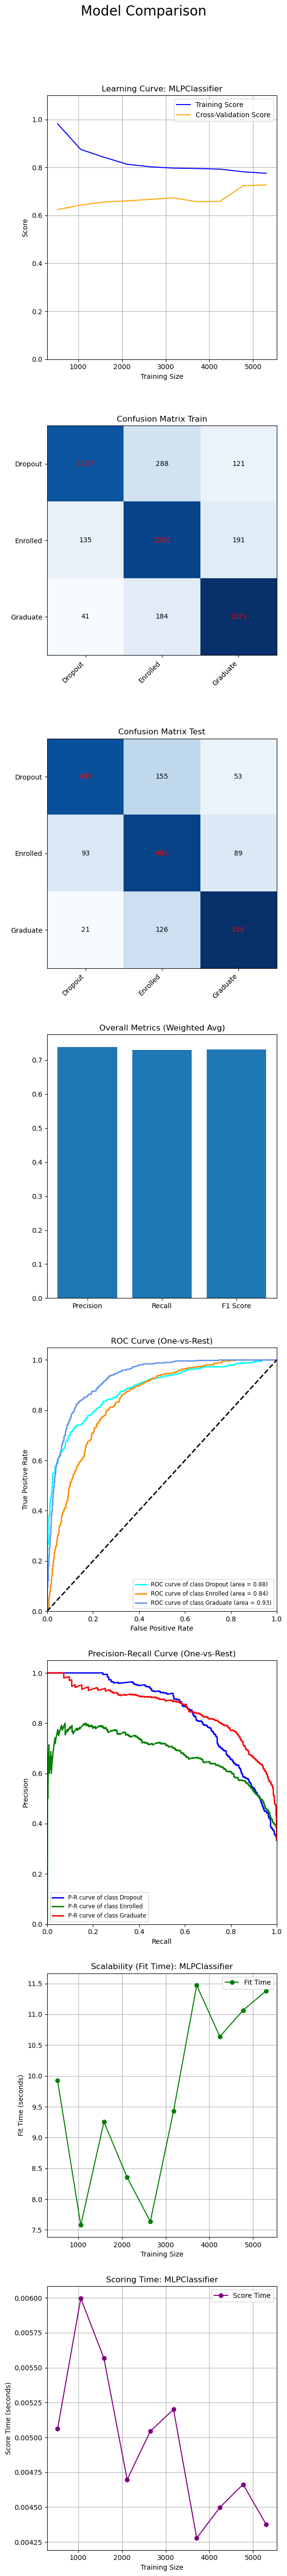

In [211]:
N = 10  # Number of top features to use for each model

for model, importance_df in zip(models, importance_dfs):
    top_features = importance_df['Feature'].head(N).tolist()
    X_top = X_resampled[top_features]
    print(f"\nTraining {model.__class__.__name__} with its top {N} features:")
    model_compare([model.__class__(**model.get_params())], X_top, y_resampled)

In [212]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder # Though SMOTE typically handles string labels, explicit encoding can be safer for some operations.

# --- 1. Load the Original Dataset ---
# Assuming 'data.csv' is in the same directory as the notebook
original_data = pd.read_csv('data.csv', sep=';')

# Clean column names (remove potential leading/trailing spaces or tabs)
original_data.columns = original_data.columns.str.strip()

# --- 2. Filter out 'Enrolled' Category ---
# Keep only 'Dropout' and 'Graduate'
data_binary_target = original_data[original_data['Target'].isin(['Dropout', 'Graduate'])].copy() # Use .copy() to avoid SettingWithCopyWarning
print(f"Data shape after filtering 'Enrolled': {data_binary_target.shape}")
print("Target value counts after filtering 'Enrolled':")
print(data_binary_target['Target'].value_counts())

# --- 3. Redefine Features (X_binary) and Target (y_binary) ---
# Assuming the last column is 'Target' and all others are features
# Re-define the 'features' list based on the cleaned column names
feature_names_binary = [col for col in data_binary_target.columns if col != 'Target']

X_binary = data_binary_target[feature_names_binary]
y_binary = data_binary_target['Target']
X_binary_for_smote = X_binary.copy() 
categorical_cols = X_binary_for_smote.select_dtypes(include=['object', 'category']).columns



processed_feature_names = X_binary_for_smote.columns.tolist()
# --- 4. Apply SMOTE to the New Binary Dataset ---
print("Applying SMOTE to the (now numeric) binary target dataset...")
smote_binary = SMOTE(random_state=42)

X_resampled_binary = None 
X_resampled_binary_df = None 

# The output of fit_resample is assigned to X_resampled_binary and y_resampled_binary
X_resampled_binary, y_resampled_binary = smote_binary.fit_resample(X_binary_for_smote, y_binary)
        
X_resampled_binary_df = pd.DataFrame(X_resampled_binary, columns=processed_feature_names)  
print("Shape of X_resampled_binary_df (after SMOTE): ", X_resampled_binary_df.shape)
print("Shape of y_resampled_binary (after SMOTE): ", y_resampled_binary.shape) 
print("Value counts in y_resampled_binary (after SMOTE):")
print(pd.Series(y_resampled_binary).value_counts())

Data shape after filtering 'Enrolled': (3630, 37)
Target value counts after filtering 'Enrolled':
Target
Graduate    2209
Dropout     1421
Name: count, dtype: int64
Applying SMOTE to the (now numeric) binary target dataset...
Shape of X_resampled_binary_df (after SMOTE):  (4418, 36)
Shape of y_resampled_binary (after SMOTE):  (4418,)
Value counts in y_resampled_binary (after SMOTE):
Target
Dropout     2209
Graduate    2209
Name: count, dtype: int64


In [213]:
def model_compare_binary(algorithm, X, y):
    figure, charts = plt.subplots(6, len(algorithm), figsize=(6 * len(algorithm), 42)) # Ensure 8 rows
    figure.suptitle('Model Comparison (Binary Target)', fontsize=20)
    classes = np.unique(y)
    n_classes = len(classes)

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
    # Binarize y_test for ROC/PR curves; for binary, this will have 2 columns if classes has 2 elements
    y_test_binarized = label_binarize(y_test, classes=classes)

    for i, algo in enumerate(algorithm):
        algo.fit(X_train, y_train)
        y_pred = algo.predict(X_test)
        y_pred_proba = algo.predict_proba(X_test) if hasattr(algo, 'predict_proba') else None

        # Print metrics like in model_compare
        print()
        print(f"Algorithm: {algo.__class__.__name__}")
        print(f"Train")
        print(f"    Accuracy: {algo.score(X_train, y_train):.4f}")
        print(f"    F1 Score: {f1_score(y_train, algo.predict(X_train), average='weighted', zero_division=0):.4f}")
        print()
        print(f"Test")
        print(f"    Accuracy: {algo.score(X_test, y_test):.4f}")
        print(f"    F1 Score: {f1_score(y_test, y_pred, average='weighted', zero_division=0):.4f}")
        print()
        print(f"Precision: {precision_score(y_test, y_pred, average='weighted', zero_division=0):.4f}")
        print(f"Recall: {recall_score(y_test, y_pred, average='weighted', zero_division=0):.4f}")
        
        
        # Learning Curve - corrected to return 5 values
        # cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=42) # Original cv from model_compare, but cv=3 is used below
        train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(
            algo, X_scaled, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), return_times=True
        )
        train_scores_mean = np.mean(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        charts[0, i].plot(train_sizes, train_scores_mean, label='Training Score', color='blue')
        charts[0, i].plot(train_sizes, test_scores_mean, label='Cross-Validation Score', color='orange')
        charts[0, i].set_title(f'Learning Curve: {algo.__class__.__name__}')
        charts[0, i].set_xlabel('Training Size')
        charts[0, i].set_ylabel('Score')
        charts[0, i].set_ylim(0, 1.1)
        charts[0, i].legend(loc='best')
        charts[0, i].grid()

        # Matriz de Confusão Treino (Added)
        y_train_pred = algo.predict(X_train)
        cm_train = confusion_matrix(y_train, y_train_pred, labels=classes)
        charts[1,i].imshow(cm_train, cmap='Blues', interpolation='nearest')
        charts[1,i].set_title('Confusion Matrix Train')
        charts[1,i].set_xticks(np.arange(n_classes))
        charts[1,i].set_yticks(np.arange(n_classes))
        charts[1,i].set_xticklabels(classes, rotation=45, ha="right")
        charts[1,i].set_yticklabels(classes)
        for row in range(n_classes):
            for col in range(n_classes):
                charts[1,i].text(col, row, cm_train[row, col], ha='center', va='center', color='red' if cm_train[row,col] > cm_train.max()/2 else 'black')
                

        # Matriz de Confusão Teste (Shifted to charts[2,i])
        cm = confusion_matrix(y_test, y_pred, labels=classes) # Use labels=classes
        charts[2, i].imshow(cm, cmap='Blues', interpolation='nearest')
        charts[2, i].set_title('Confusion Matrix Test')
        charts[2, i].set_xticks(np.arange(n_classes))
        charts[2, i].set_yticks(np.arange(n_classes))
        charts[2, i].set_xticklabels(classes, rotation=45, ha="right")
        charts[2, i].set_yticklabels(classes) # Added from model_compare
        charts[2, i].set_ylabel('True label')
        charts[2, i].set_xlabel('Predicted label')
        for row in range(n_classes):
            for col in range(n_classes):
                charts[2, i].text(col, row, cm[row, col], ha='center', va='center',
                                  color='red' if cm[row, col] > cm.max() / 2 else 'black')
        
        
        # Gráfico de Barras das Métricas (Shifted to charts[3,i])
        precision_val = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall_val = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1_val = f1_score(y_test, y_pred, average='weighted', zero_division=0)
        charts[3, i].bar(['Precision', 'Recall', 'F1 Score'], [precision_val, recall_val, f1_val])
        charts[3, i].set_ylim(0, 1)
        charts[3, i].set_title('Overall Metrics (Weighted Avg)')
        charts[3, i].set_ylabel('Score')
        # charts[3, i].set_xlabel('Metric') # Removed xlabel as it's clear from bar labels


    

        # Scalability of the model (Fit Times) (Shifted to charts[6,i])
        charts[4,i].plot(train_sizes, np.mean(fit_times, axis=1), label='Fit Time', color='green', marker='o')
        charts[4,i].set_title(f'Scalability (Fit Time): {algo.__class__.__name__}')
        charts[4,i].set_xlabel('Training Size')
        charts[4,i].set_ylabel('Fit Time (seconds)')
        charts[4,i].legend(loc='best')
        charts[4,i].grid(True)
        
        # Scoring Time vs Training Size (Shifted to charts[7,i])
        charts[5,i].plot(train_sizes, np.mean(score_times, axis=1), label='Score Time', color='purple', marker='o')
        charts[5,i].set_title(f'Scoring Time: {algo.__class__.__name__}')
        charts[5,i].set_xlabel('Training Size')
        charts[5,i].set_ylabel('Score Time (seconds)')
        charts[5,i].legend(loc='best')
        charts[5,i].grid(True)

    plt.subplots_adjust(hspace=0.5, wspace=0.4) # Adjusted hspace for 8 rows
    plt.subplots_adjust(top=0.95) 
    plt.tight_layout(rect=[0, 0, 1, 0.96]) # Ensure suptitle fits
    plt.show()


Algorithm: LogisticRegression
Train
    Accuracy: 0.9196
    F1 Score: 0.9196

Test
    Accuracy: 0.9095
    F1 Score: 0.9094

Precision: 0.9117
Recall: 0.9095

Algorithm: RandomForestClassifier
Train
    Accuracy: 1.0000
    F1 Score: 1.0000

Test
    Accuracy: 0.9061
    F1 Score: 0.9059

Precision: 0.9090
Recall: 0.9061

Algorithm: MLPClassifier
Train
    Accuracy: 1.0000
    F1 Score: 1.0000

Test
    Accuracy: 0.8959
    F1 Score: 0.8959

Precision: 0.8962
Recall: 0.8959


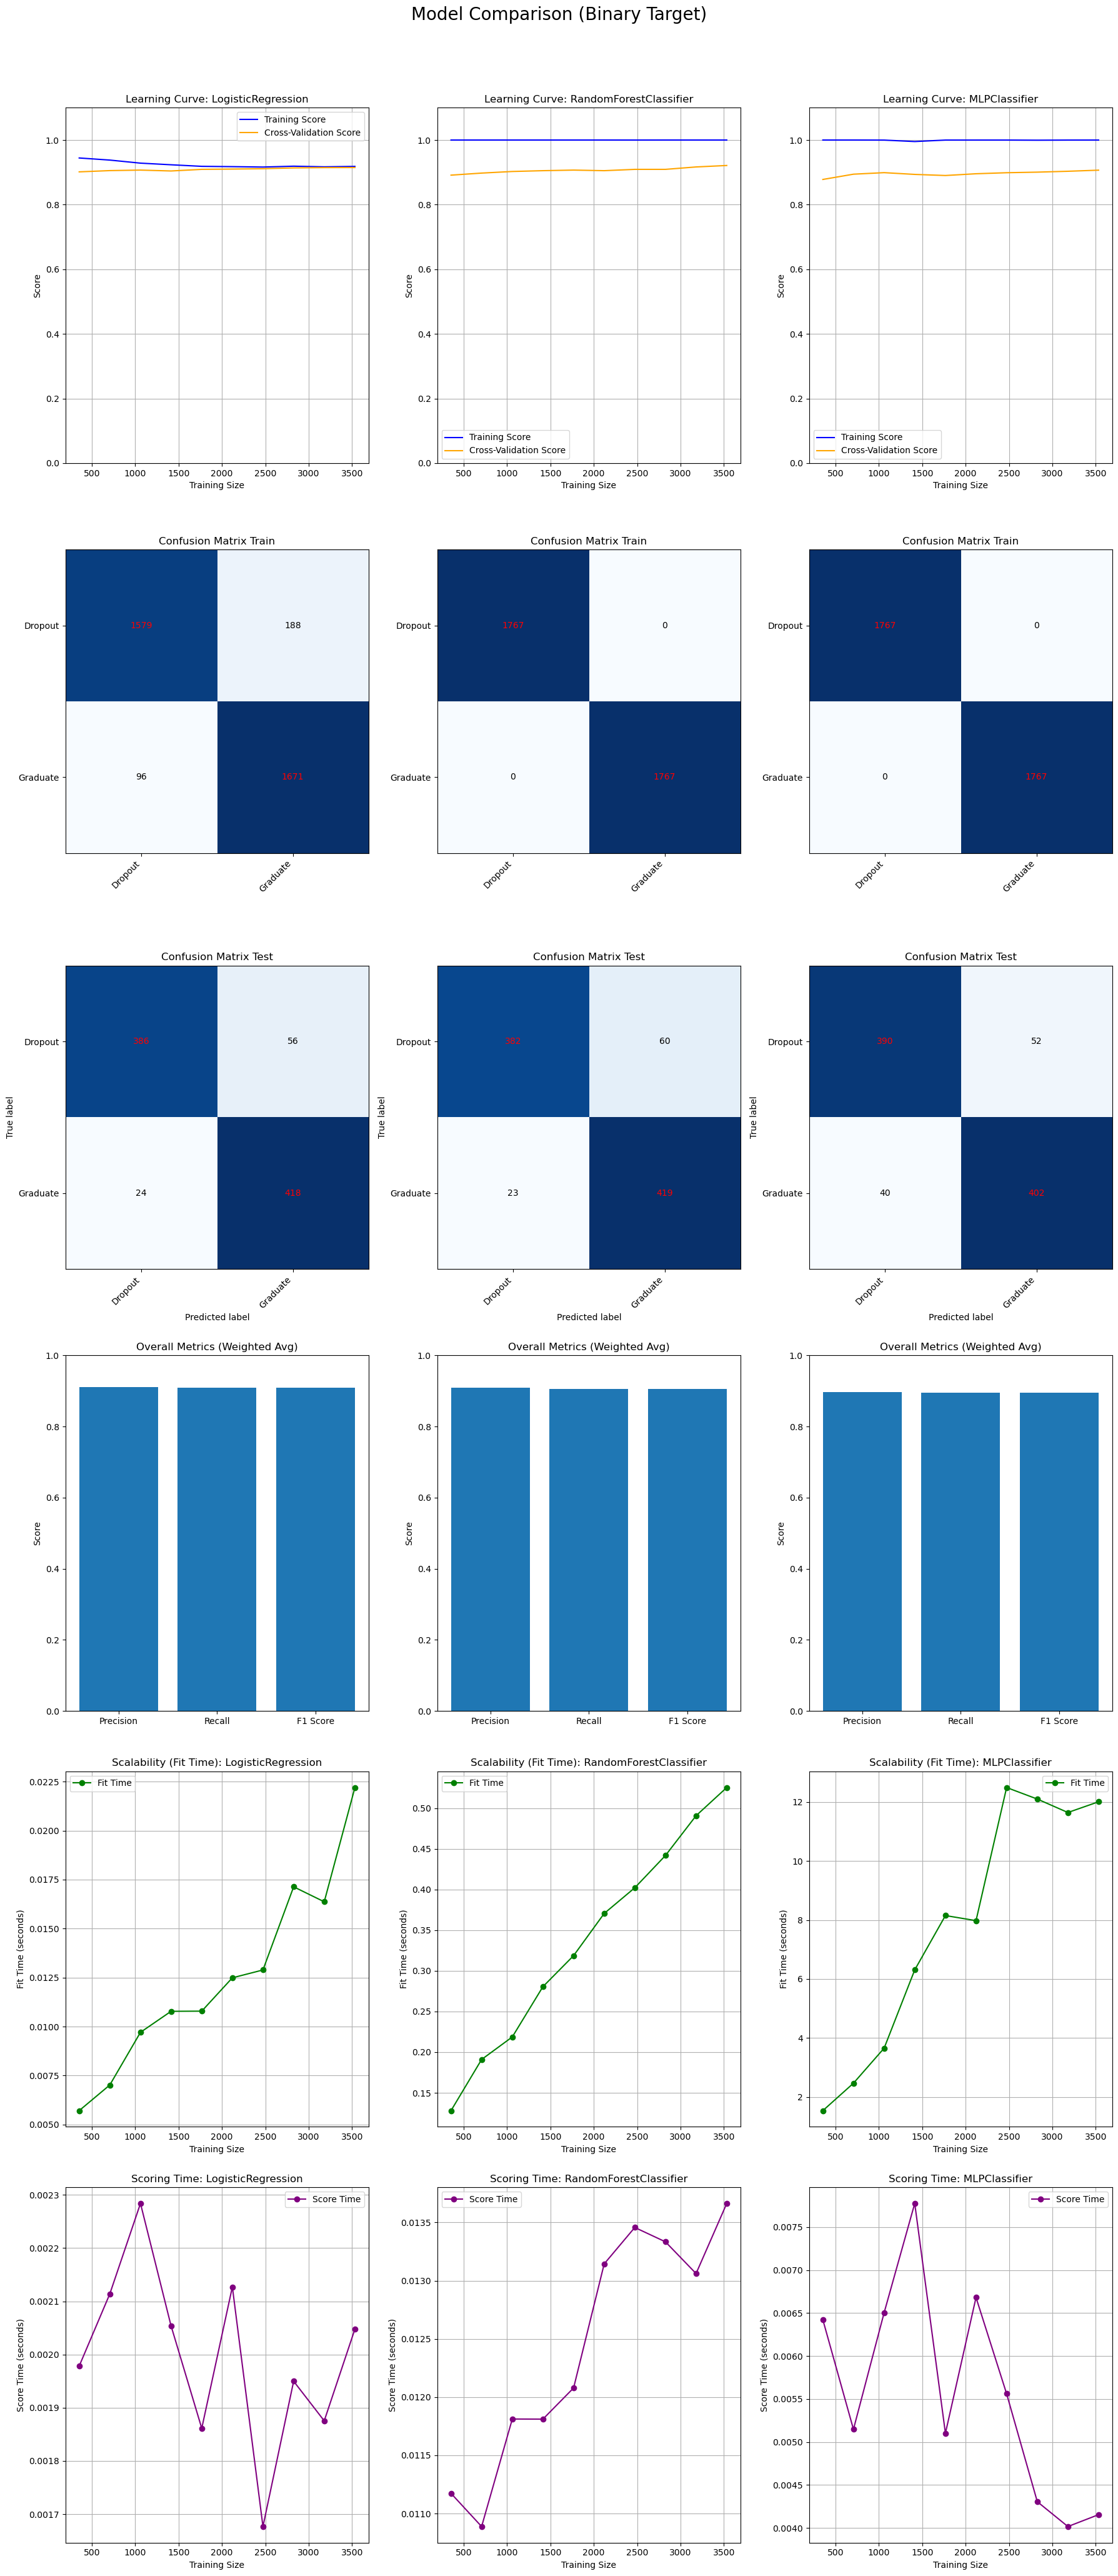

In [214]:
model_compare_binary([
    LogisticRegression(max_iter=5000),
    RandomForestClassifier(),
    MLPClassifier(max_iter=5000)
], X_resampled_binary_df, y_resampled_binary)